 # Курсовая работа

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('Gross.csv')

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data = data.drop(['Invoice ID','Branch','City','Customer type','Product line','Unit price','Quantity','Time','Payment','Rating','Gender'], axis=1)

,Tax 5%,Total,Date,cogs,gross margin percentage,gross income
0,26.1415,548.9715,1/5/2019,522.83,4.761905,26.1415
1,3.8200,80.2200,3/8/2019,76.40,4.761905,3.8200
2,16.2155,340.5255,3/3/2019,324.31,4.761905,16.2155
3,23.2880,489.0480,1/27/2019,465.76,4.761905,23.2880
4,30.2085,634.3785,2/8/2019,604.17,4.761905,30.2085


In [5]:
data.shape

(1000, 6)

In [7]:
import random
data['Year'] = [random.randint(2017, 2024) for _ in range(len(data))]

In [8]:
data = data.drop('Date', axis=1)
data.head()

,Tax 5%,Total,cogs,gross margin percentage,gross income,Year
0,26.1415,548.9715,522.83,4.761905,26.1415,2024
1,3.8200,80.2200,76.40,4.761905,3.8200,2019
2,16.2155,340.5255,324.31,4.761905,16.2155,2021
3,23.2880,489.0480,465.76,4.761905,23.2880,2023
4,30.2085,634.3785,604.17,4.761905,30.2085,2018


In [9]:
sum_by_year = data.groupby('Year')['gross income'].sum()
print(sum_by_year)

Year
2017    1804.9250
2018    1606.9710
2019    2164.1150
2020    1913.7075
2021    1889.4425
2022    2087.8405
2023    1908.5415
2024    2003.8260
Name: gross income, dtype: float64


In [10]:
absolute_dynamics = sum_by_year.diff().fillna(0)
print(absolute_dynamics)

Year
2017      0.0000
2018   -197.9540
2019    557.1440
2020   -250.4075
2021    -24.2650
2022    198.3980
2023   -179.2990
2024     95.2845
Name: gross income, dtype: float64


In [11]:
growth_rate = (sum_by_year / sum_by_year.shift(1)).fillna(0) * 100
print(growth_rate)

Year
2017      0.000000
2018     89.032564
2019    134.670445
2020     88.429104
2021     98.732042
2022    110.500346
2023     91.412227
2024    104.992530
Name: gross income, dtype: float64


In [12]:
increment_rate = (absolute_dynamics / sum_by_year.shift(1)).fillna(0) * 100
print(increment_rate)

Year
2017     0.000000
2018   -10.967436
2019    34.670445
2020   -11.570896
2021    -1.267958
2022    10.500346
2023    -8.587773
2024     4.992530
Name: gross income, dtype: float64


In [13]:
geometric_mean = sum_by_year.mean()

absolute_dynamics_mean = absolute_dynamics.mean()

growth_rate_mean = growth_rate.mean()

increment_rate_mean = increment_rate.mean()

# Выводим результаты
print(f"Средняя геометрическая: {geometric_mean}")
print(f"Средняя абсолютная динамика: {absolute_dynamics_mean}")
print(f"Средний темп роста: {growth_rate_mean}%")
print(f"Средний темп прироста: {increment_rate_mean}%")

Средняя геометрическая: 1922.4211249999998
Средняя абсолютная динамика: 24.86262500000001
Средний темп роста: 89.72115723127463%
Средний темп прироста: 2.221157231274634%


In [15]:
years = set(data['Year'])
sorted(years)


[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

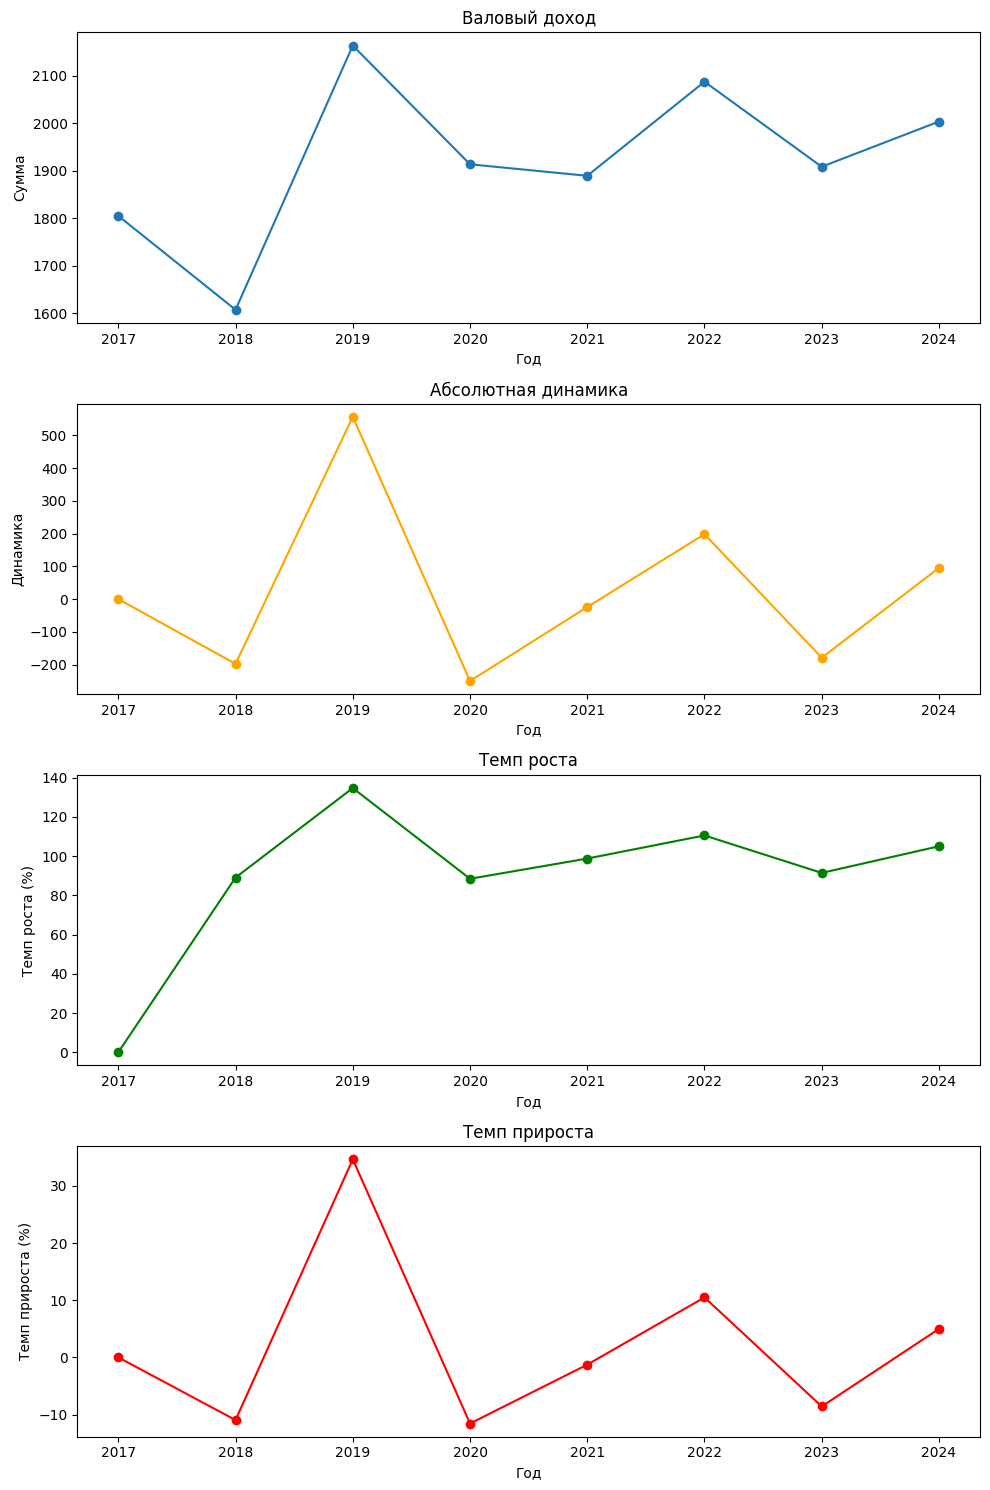

In [17]:
# Создаем фигуру и оси
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# График суммы по годам
axs[0].plot(sorted(years), sum_by_year, marker='o')
axs[0].set_title('Валовый доход')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Сумма')

# График абсолютной динамики
axs[1].plot(sorted(years), absolute_dynamics, marker='o', color='orange')
axs[1].set_title('Абсолютная динамика')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Динамика')

# График темпа роста
axs[2].plot(sorted(years), growth_rate, marker='o', color='green')
axs[2].set_title('Темп роста')
axs[2].set_xlabel('Год')
axs[2].set_ylabel('Темп роста (%)')

# График темпа прироста
axs[3].plot(sorted(years), increment_rate, marker='o', color='red')
axs[3].set_title('Темп прироста')
axs[3].set_xlabel('Год')
axs[3].set_ylabel('Темп прироста (%)')

# Отображаем графики
plt.tight_layout()
plt.show()

In [18]:
# Тест Шапиро-Уилка
shapiro_test = stats.shapiro(data['gross income'])
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# Если p-value < 0.05, данные не соответствуют нормальному распределению
if shapiro_test[1] < 0.05:
    print("Гипотеза о нормальности распределения отвергнута.")
else:
    print("Нет оснований отвергать гипотезу о нормальности распределения.")

Shapiro-Wilk test statistic: 0.9087597502792791, p-value: 5.3037050535473686e-24
Гипотеза о нормальности распределения отвергнута.


In [19]:
chi2_stat, p_val = stats.normaltest(data['gross income'])

print(f'Chi-squared statistic: {chi2_stat}')
print(f'P-value: {p_val}')

# Интерпретация результата
alpha = 0.05  # Уровень значимости
if p_val < alpha:
    print('Данные не следуют нормальному распределению (отвергаем H0)')
else:
    print('Нет оснований отвергать H0 о нормальности распределения данных')


Chi-squared statistic: 101.33837755938629
P-value: 9.877588066863896e-23
Данные не следуют нормальному распределению (отвергаем H0)


     Tax 5%     Total      cogs  gross margin percentage  gross income  Year
0  4.593591  2.555509 -1.422280                 4.761905       26.1415  2024
1  1.001275  4.129585  0.592361                 4.761905        3.8200  2019
2  2.707545 -2.575607 -1.407831                 4.761905       16.2155  2021
3  3.879336  1.469228 -0.848395                 4.761905       23.2880  2023
4  4.082392 -2.132550 -0.582616                 4.761905       30.2085  2018


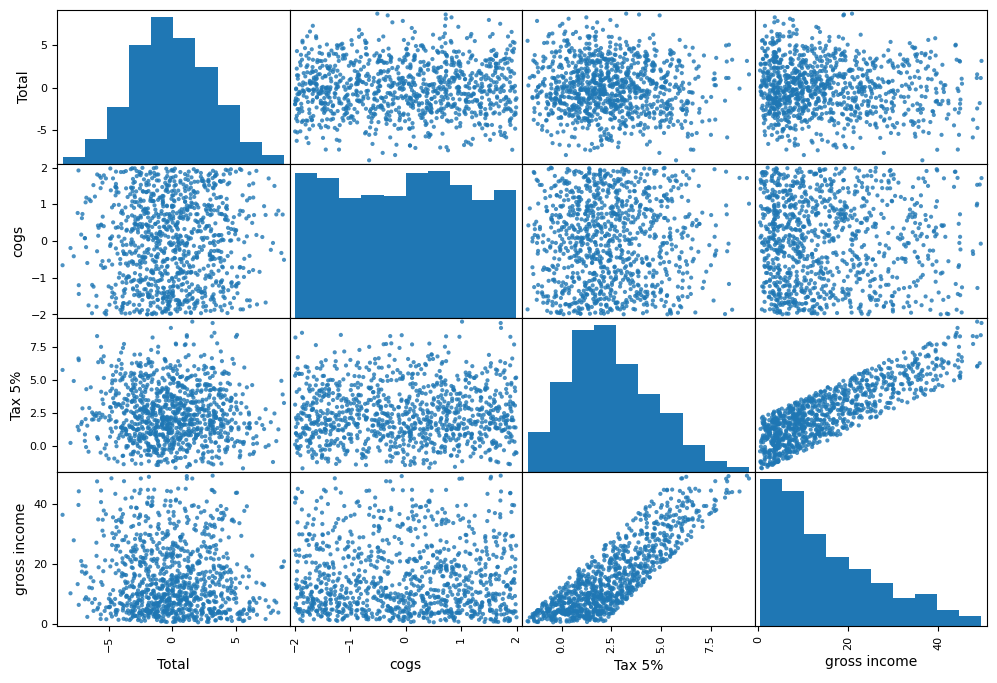

In [33]:
data['Tax 5%'] = [tax / 10**10 + random.uniform(-2, 2) for tax in data['Tax 5%']]
data['Total'] = [tax  + random.uniform(-2, 2) for tax in data['Total']]
data['cogs'] = [tax / 10**9 + random.uniform(-2, 2) for tax in data['cogs']]

print(data.head())

# Построение корреляционного поля
pd.plotting.scatter_matrix(data[['Total', 'cogs', 'Tax 5%', 'gross income']], alpha=0.8, figsize=(12, 8))

# Показать график
plt.show()

In [35]:
import statsmodels.api as sm
# Определите зависимую переменную (Y) и независимые переменные (X1, X2, X3)
Y = data['gross income']
X = data[['Total', 'cogs', 'Tax 5%']]

# Добавляем константу к независимым переменным для учета свободного члена (intercept)
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(Y, X).fit()

# Вывод результатов модели
print(model.summary())

# Можно использовать VIF для проверки мультиколлинеарности
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисление VIF для каждой независимой переменной
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Параметрическая идентификация
# Проверка значимости коэффициентов
print(model.pvalues)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

                            OLS Regression Results                            
Dep. Variable:           gross income   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     877.2
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          5.84e-279
Time:                        23:30:32   Log-Likelihood:                -3232.5
No. Observations:                1000   AIC:                             6473.
Df Residuals:                     996   BIC:                             6493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8878      0.297     13.079      0.0

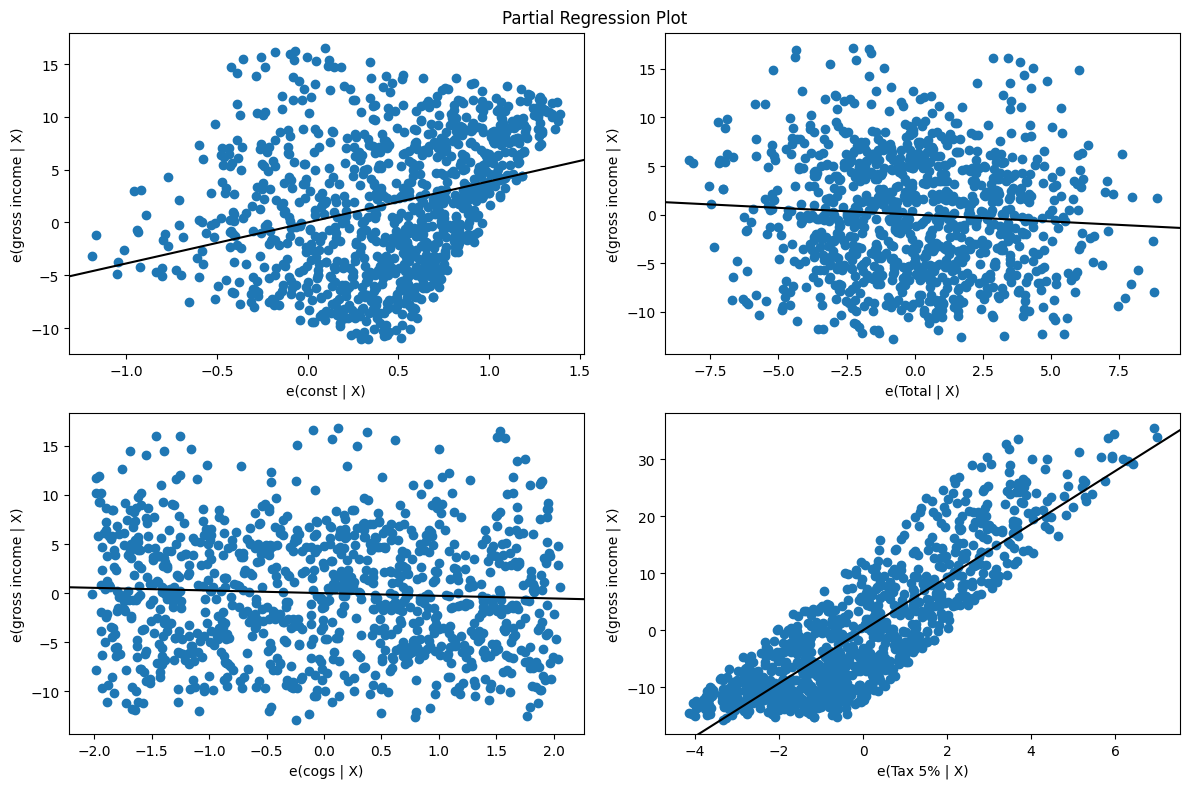

In [36]:
# Создаем частичные регрессионные графики
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

# Показываем графики
plt.show()

In [40]:
actual_balance_2024 = data[data['Year'] == 2020]['gross income'].values[0] + 6.5

# Средние значения для независимых переменных
mean_age = data['Total'].mean()
mean_campaign = data['cogs'].mean()
mean_duration = data['Tax 5%'].mean()

# Создаем DataFrame для прогноза
X_predict = pd.DataFrame({'const': 1, 'Total': [mean_age], 'cogs': [mean_campaign], 'Tax 5%': [mean_duration]})

# Прогнозируем значение balance для 2020 года
predicted_balance_2024 = model.predict(X_predict)[0]

# Рассчитываем относительную погрешность прогноза
relative_error = abs(predicted_balance_2024 - actual_balance_2024) / actual_balance_2024

# Выводим прогноз и относительную погрешность
print(f"Прогнозируемое значение gross income для 2024 года: {predicted_balance_2024}")
print(f"Фактическое значение gross income для 2024 года: {actual_balance_2024}")
print(f"Относительная погрешность прогноза: {relative_error}")

Прогнозируемое значение gross income для 2024 года: 15.37936900000001
Фактическое значение gross income для 2024 года: 14.726
Относительная погрешность прогноза: 0.04436839603422576
